# Case Study: Fourier Analysis

## 1. Basic Code To Create and Draw L-Systems

### L-System Function and Basic Examples from Wikipedia Check

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import turtle
from scipy.signal import find_peaks

#Any L-System function
def L_system(N, V='', C='', A='', R=['']):
    '''
    This function uses a given set of variables, constants, rules and an axiom to iterate lines which builds up on the previous one.
    
    input:
        N:    number of times to run the function. e.g. 7
        V:          string which contains all the variables. e.g. 'AB' for variables 'A' and 'B'
        C:          string which contains all the constants. e.g. '+-' for constants '+' and '-'
        A:              string which contains the initial state. e.g. 'A+B-AA'.
                                Can only contain variables and constants characters.
        R:              list of strings which contains the rules for each constants in the order the constants
                                are given, e.g. ['AA-', 'AB+-A'] for rule 'A' --> 'AA-' and rule 'B' --> 'AB+-A'.
                                Note that there need to be as many rules as variables.
                                Can only contain variables and constants characters.
    output:
        List of N+1 strings, one string for each iteration and the original axiom string.
    '''
    variables = list(V) #separate the variables into list of one character strings
    constants = list(C) #separate the constants into list of one character strings
    axiom = list(A) #separate the axiom into list of one character strings
    rules = [] #separate rules into list of list of one character strings
    for ll in R:
        rules.append(list(ll))
    saved = []  #save the axiom as the first line to return
    line_before = axiom
    saved.append(''.join(axiom))
    for jj in range(N):   #iterate over the rules for as many interation as wanted
        line_after = []
        for ii in range(len(line_before)):  #go over each characters in the string to apply rules to each characters
            for pp in range(len(variables)):    #apply rules to each variables
                if line_before[ii] == variables[pp]:
                    line_after.extend(rules[pp])
            for kk in constants:    #place each constants in the new string list. Constants do not change.
                if line_before[ii] == kk:
                    line_after.extend(kk)
        saved.append(''.join(line_after))   #save the new list of one character strings as a single string
        line_before = line_after    #set the input string for the next iteration as the previous string
    return saved

#Wiki Examples
algea = L_system(4, V='AB', A='A', R=['AB', 'A'])
tree = L_system(7, V='01', C='[]', A='0', R=['1[0]0', '11'])
cantor = L_system(3, V='AB', A='A', R=['ABA', 'BBB'])
koch = L_system(2, V='F', C='+-', A='F', R=['F+F-F-F+F'])
triangle = L_system(2, V='FG', C='+-', A='F-G-G', R=['F-G+F+G-F', 'GG'])
curve = L_system(3, V='AB', C='+-', A='A', R=['B-A-B', 'A+B+A'])
dragon = L_system(3, V='FG', C='+-', A='F', R=['F+G', 'F-G'])
fractal_plant = L_system(3, V='XF', C='+-[]', A='X', R=['F+[[X]-X]-F[-FX]+X', 'FF'])


### General Drawing Function and Basic Drawing Check

In [2]:
#General Drawing Function
def draw(Number_of_iteration, V1='', C1='', A1='', R1=[''], length=10, angle=25, start=[-150,-250], movie=False, save=False, filename='test.eps'):
    fractal_plant = L_system(Number_of_iteration, V=V1, C=C1, A=A1, R=R1)
    #take canvas size to be 250 by 250 units
    #pen = turtle.Turtle()
    
    # turtle sometimes throws weird errors, this will fix
    try:
        pen = turtle.Turtle()
    except:
        pen = turtle.Turtle()

    pen.speed(0) #control speed at which pen is moving
    pen.color('black') #controls color of pen
    #pen.color('green')
    pen.hideturtle() #hide the cursor on the canvas
    turtle.tracer(movie) #hide the movie animation

    fractal_plant_draw = list(fractal_plant[-1])

    pen.setheading(90) #start by drawing up
    pen.penup() #pen does not draw on canvas in that state, but does move
    pen.setposition(start) #start from bottom centre of page
    pen.pendown() #pen draws on canvas in that state
    position_save = []
    angle_save = []
    for ii in range(len(fractal_plant_draw)):
        if fractal_plant_draw[ii] == 'X':
            pen.pendown()
            pen.penup()
        elif fractal_plant_draw[ii] == 'F' or fractal_plant_draw[ii] == 'G':
            pen.pendown()
            pen.forward(length)
            pen.penup()
        elif fractal_plant_draw[ii] == '[':
            position_save.append(pen.position())
            angle_save.append(pen.heading())
        elif fractal_plant_draw[ii] == ']':
            pen.setposition(position_save[-1])
            pen.setheading(angle_save[-1])
            position_save.pop() #remove last saved position once used
            angle_save.pop() #remove last saved angle once used
        elif fractal_plant_draw[ii] == '+':
            pen.left(angle)
        elif fractal_plant_draw[ii] == '-':
            pen.right(angle)

    if save:
        turtle.getcanvas().postscript(file=filename) #try to save image from turtle directly
    turtle.exitonclick() #keep the drawing open until clicking once done
    return

draw(3, V1='F', C1='+-', A1='F', R1=['F+F-F-F+F'], angle=90) #koch
draw(3, V1='FG', C1='+-', A1='F-G-G', R1=['F-G+F+G-F', 'GG'], length=20, angle=120, start=[-100,-100]) #triangle
draw(6, V1='FG', C1='+-', A1='F', R1=['F+G', 'F-G'], angle=90, start=[0,0]) #dragon curve
draw(3, V1='XF', C1='+-[]', A1='X', R1=['F+[[X]-X]-F[-FX]+X', 'FF']) #fractal plant
draw(4, V1='GF', C1='[]+-', A1='G', R1=['F+[G]--G', 'FF'], angle=45) #tree (modified from wiki to plot with general plotting string symbols



The Code above is my version of the Interim report code, all code below simply uses the 'draw' function or the last output string from the 'L_system' function.

## 2. Fourier Analsysis

### General Fourier Spectrum of any string created by L-system

An input string with given characters (either F,X,G,+,-,[,]) is converted to a list of numbers with each characters a corresponding number. The fast fourier transform of that list is then taken and plotted from 0 to 1 along x axis, which makes the units of this axis the frequency of elements in the string in units of string elements (e.g if character in string repeats every other elements, then frequency is 1/2).

In [3]:
#Fourier Analysis
def Fourier(sequence):
    '''
    Take a sequence generated by L_system function, break it appart and assign numbers to each symbols,
    then take a fourier transform of it to analyse patterns in the sequence.
    
    input:
        sequence: list with a single string contaning he sequence to be analysed, generated by L_system function.
    output:
        element: list of elements in the sequence (assign numbers match the position of the argument in the list)
        steps: return 1D array of steps between 0-1 to normalize the results of the fourier transform (use as x_axis on plots)
        sequence_values (1D array): contains the sequence rewritten as a sequence of numbers
        fourier_sequence: contains the fourier transform of seuence_values array
    '''
    split_sequence = list(sequence) #break appart each element of string

    #save different elements of string
    element = []
    for ii in split_sequence:
        if ii not in element:
            element.append(ii)

    #assign a given number for each elements:
    #X=0, F=1, G=2, +=3, -=4, [=5, ]=6
    
    #assign each element a value:
    characters = list('XFG+-[]')
    sequence_values = split_sequence
    for jj in range(len(characters)):
        sequence_values = [jj if aa == characters[jj] else aa for aa in sequence_values]

    #take fourier transform:
    fourier_sequence = np.fft.fft(np.array(sequence_values))

    #define the step size so the the string is normalized between 0 and 1 to make analysis easier
    steps = np.linspace(0, 1, np.shape(sequence_values)[0]) #note that steps are frequency since normalized to 1.
    
    return element, steps, np.array(sequence_values), fourier_sequence


def Fourier_plot(sequence, plot_values=False, Real=False, Imag=False, Power=True):
    '''
    Plots the fourier spectrum of the input string
    '''
    elem, x_axis_steps, values, fourier = Fourier(sequence)

    if plot_values:
        #plot values
        plt.plot(x_axis_steps, values, ls='', color='blue', marker='o', label=elem)
        plt.legend()
        #plt.show()

    #plt Fourier of values
    if Real:
        plt.plot(x_axis_steps, np.real(fourier), ls='', color='blue', marker='.', label='Real')
    if Imag:
        plt.plot(x_axis_steps, np.imag(fourier), ls='', color='red', marker='x', label='Imaginary')
    if Power:
        plt.plot(x_axis_steps[1:], np.power(np.imag(fourier[1:])*np.imag(fourier[1:])+np.real(fourier[1:])*np.real(fourier[1:]),0.5), ls='', color='green', marker='.', label='Power')
    plt.legend()
    plt.show()

    return



### Check Simple Cases for Fourier Spectrums

#### 1. Alternating 2 Characters

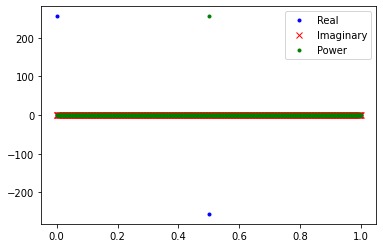

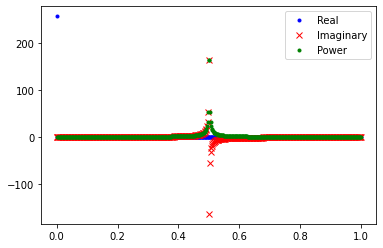

In [4]:
#Analyse the Results of the Fourier function:

#see repeating sequence of 2 values, with alternating which value goes first
test_1a = L_system(8, V='F', C='X', A='XF', R=['FXF'])[-1] #XFXFXFXF
test_1b = L_system(8, V='F', C='X', A='F', R=['FXF'])[-1] #FXFXFXFX

Fourier_plot(test_1a, Real=True, Imag=True, Power=True)
Fourier_plot(test_1b, Real=True, Imag=True, Power=True)

#Fourier_plot(test_1a)
#Fourier_plot(test_1b)

For simple sequence of two alternating characters, the peak in the spectrum happens at frequency 0.5, since in the repeating pattern of N=2 elements, there is $l=1$ F and $l=1$ X, so see frequency $\frac{l}{N} = \frac{1}{2}$.
Note that the fourier spectrum looks very different depending if starts with X or F, however since do not care about the start of the string, only the power of the spectrum will be used in the analysis since lead to similar results independent of the starting element.
Furthermore, note that the fourier spectrum becomes a sharper peak for longer strings, and the plants which will be analysed have strings of many thousands characters at least which makes this peak sharper and better for analysis.
It is important to note that the first element of the fourier spectrum is simply a sum of all the elements of the strings, and therefore is irelevent and not plotted in the power spectrum since each characters is given an arbitrary value. Later analysis will simply normalize the power spectrums relative to that sum.

#### 2. Alternating 3 and 4 Characters

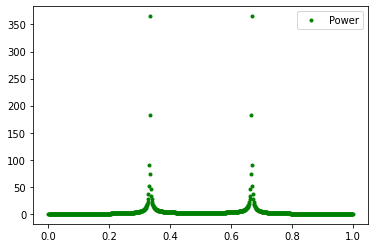

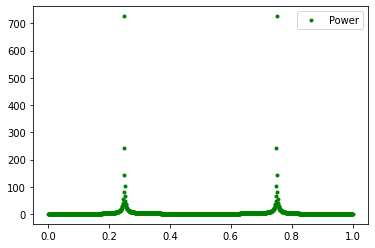

In [5]:
#repeating 3 values sequence:
test_1c = L_system(8, V='F', C='XG', A='F', R=['FXGF'])[-1] #simple test 2
Fourier_plot(test_1c)

#repeating 4 values sequence:
test_1d = L_system(8, V='F', C='XG+', A='F', R=['FXG+F'])[-1] #simple test 2
Fourier_plot(test_1d)

The alternating 3 character string is a repeating pattern of N=3 characters, with each characters within is repeating l=1, so the frequency of the peak appearing in the spectrum is $\frac{l}{N}=\frac{1}{3}=0.33$. Similarly, the alternating 4 character string has a peak at frequency $\frac{l}{N}=\frac{1}{4}=0.25$ as expected.
Note that the spectrum peaks are mirrored about the f=1/2 point. This is because the frequencies pass that are integer multiples of the frequency before that point. This results in the second half o the spectrum holding no new information about the string and therefor only the first half (0-0.5) will be analysed.

#### 3. More complicated repeating patterns

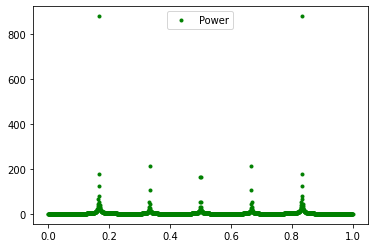

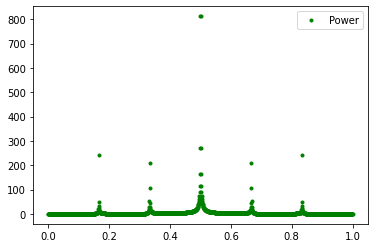

In [6]:
#More complicated repeating patterns:
test_1e = L_system(8, V='F', C='XG', A='F', R=['FXXGGGF'])[-1]
Fourier_plot(test_1e)
#Here frequencies at 1/6 for F, 2/6 for X, 3/6 for G appear. This is because 1 F, 2X and 3G every 6 characters

test_1f = L_system(8, V='F', C='XG', A='F', R=['FGXGXGF'])[-1]
Fourier_plot(test_1f)
#Same frequency here. BUT different power values for each frequencies
#so look into how these values corespond to frequencies

The repeating patterns FXXGGG and FGXGXGF both have a length of N=6 characters, with l=1 F, l=2 X and l=3 G, so the associated peaks in the spectrums appear at frequencies f=1/6=0.16 for F, f=2/6=0.33 for X and f=3/6=0.5 for G as can be seen in the plots. However the height of these peaks is different. This demonstrates that more complicated patterns of strings can be analysed using fourier spectrums, and that information of the repeating pattern itself is encoded in both the frequency hand heights of the peaks. Therefore both these characteristics will be used in analysis the much more complex strings used in drawing plants.


### Analyse Plant Examples from Textbook

#### 1. Code and Draw Plant Examples

In [7]:
#now code more plant examples:
plant_1 = L_system(5 , V='F', C='+-[]', A='F', R=['F[+F]F[-F]F'])[-1] #from page 25 in textbook
plant_2 = L_system(5 , V='F', C='+-[]', A='F', R=['F[+F]F[-F][F]'])[-1] #from page 25 in textbook
plant_3 = L_system(5 , V='F', C='+-[]', A='F', R=['FF-[-F+F+F]+[+F-F-F]'])[-1] #from page 25 in textbook
plant_4 = L_system(5 , V='XF', C='+-[]', A='X', R=['F[+X]F[-X]+X', 'FF'])[-1] #from page 25 in textbook
plant_5 = L_system(5 , V='XF', C='+-[]', A='X', R=['F[+X][-X]FX', 'FF'])[-1] #from page 25 in textbook
plant_6 = L_system(5 , V='XF', C='+-[]', A='X', R=['F-[[X]+X]+F[+FX]-X', 'FF'])[-1] #from page 25 in textbook, repeat of wiki fractal but reversed
#These examples will be used to analyse what the fourier spectrum of the string that is known to create a plant looks like.

plants_to_compare = [plant_1, plant_2, plant_3, plant_4, plant_5, plant_6] #store in array to be used later in analysis

#check drawing of the examples:
draw(5 , V1='F', C1='+-[]', A1='F', R1=['F[+F]F[-F]F'], angle=25.7, length=2)  #from page 25 in textbook
draw(5 , V1='F', C1='+-[]', A1='F', R1=['F[+F]F[-F][F]'], angle=20, length=7)  #from page 25 in textbook
draw(4 , V1='F', C1='+-[]', A1='F', R1=['FF-[-F+F+F]+[+F-F-F]'], angle=22.5, length=8)  #from page 25 in textbook
draw(6 , V1='XF', C1='+-[]', A1='X', R1=['F[+X]F[-X]+X', 'FF'], angle=20, length=3)  #from page 25 in textbook
draw(5 , V1='XF', C1='+-[]', A1='X', R1=['F[+X][-X]FX', 'FF'], angle=25.7, length=7)  #from page 25 in textbook
draw(4 , V1='XF', C1='+-[]', A1='X', R1=['F-[[X]+X]+F[+FX]-X', 'FF'], angle=22.5)  #from page 25 in textbook, same as wiki fractal but other way around


#### 2. Look at Fourier Spectrum of Plants

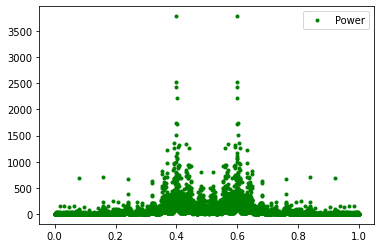

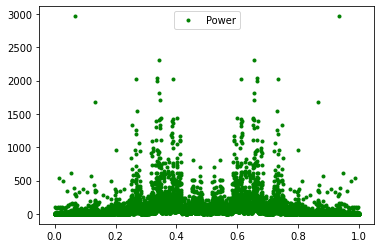

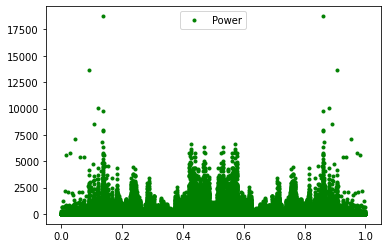

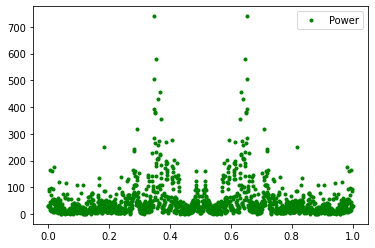

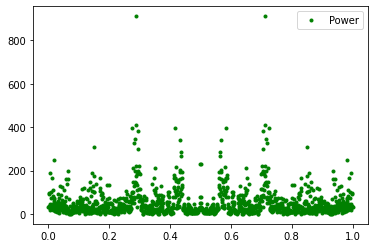

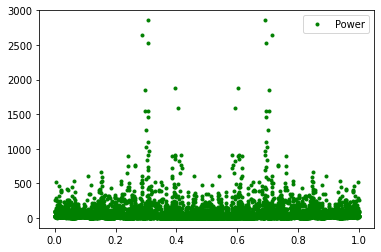

In [8]:
#plot fourier of plants
Fourier_plot(plant_1)
Fourier_plot(plant_2)
Fourier_plot(plant_3)
Fourier_plot(plant_4)
Fourier_plot(plant_5)
Fourier_plot(plant_6)


Qualitative Analysis of Fourier spectrums: The spectrums vary widely for each plants generated, however they all have a set of some more relevent conventrations of peaks. A pattern in those peaks is difficult to see by eyes. However, can now develop code to extract the position on heights of these concentrations of peaks.

#### 3. Automate Analysis of Fourier Spectrum

In [9]:
#To Analysie plant examples: Look at the following 2 characteristic of power spectrum: (only in the power spectrum)
#1) relevent frequencies f
#2) height of f

#do moving average to peaks y values:
def moving_ave(input_array):
    '''
    Takes the moving average of input 1D array with 2 step in each direction. The boundary are cyclicalin the calculation
    input:
        input_array: 1D array to smoothen
    output:
        output_array: 1D output smoothened array
    '''
    input_array_left = np.roll(input_array,1,axis=0)
    input_array_right = np.roll(input_array,-1,axis=0)

    output_array = (input_array_left + input_array + input_array_right)/3
    return output_array

#find the peaks
def analysis_peak_finder(sequence, plots=False):
    elem, x_axis, values, fourier = Fourier(sequence) #get the fourier spectrum
    power = np.power(np.imag(fourier)*np.imag(fourier)+np.real(fourier)*np.real(fourier),0.5) #calculate the power
    sum_all = power[0] #get sum
    power_norm = power/sum_all #Normalize the fourier to the sum for analysis

    #get ratio of each values
    ratios = np.zeros(7,float) #for X, F, G, +, -, [, ]
    for kk in range(7):
        ratios[kk] = np.count_nonzero(values == kk)/np.shape(values)[0]

    #remove 1st value and 2nd half of fourier data since redundent info
    power_norm_cut = power_norm[1:int(len(power_norm)/2)]
    x_axis_cut = x_axis[1:int(len(power_norm)/2)]
    
    #Find peaks with Scipy
    peaks = find_peaks(power_norm_cut, height=1/100, distance=0.01*len(power_norm_cut)) #select 100 pts from spectrum
    
    #heigh acts like minimum threshold, ok to use since all values normalized
    #distance allows to select ~100 peaks per power spectrum

    peaks_x = []
    peaks_y = []
    for ii in range(len(peaks[0])):
        peaks_x.append(x_axis_cut[peaks[0][ii]])
        peaks_y.append(power_norm_cut[peaks[0][ii]])
    
    peaks_y_smooth = moving_ave(peaks_y) #do smoothing average of peaks

    #Find the peaks in the smoothend set of peaks:
    peaks_smooth = find_peaks(peaks_y_smooth, height=1/1000)#, distance=1)#0.01*len(peaks_y_smooth)) #select roughly 10 peaks
    peaks_x_smooth = []
    peaks_y_smooth_found = []
    for ii in range(len(peaks_smooth[0])):
        peaks_x_smooth.append(peaks_x[peaks_smooth[0][ii]])
        peaks_y_smooth_found.append(peaks_y_smooth[peaks_smooth[0][ii]])

    #Save only the 4 most prominent peaks
    peak_table = np.column_stack((peaks_x_smooth, peaks_y_smooth_found))
    new_peak_table = peak_table[np.argsort(-peak_table[:,1])[:4]]

    if plots:
        plt.plot(x_axis_cut, power_norm_cut, ls='-', color='blue', marker='')
        plt.plot(peaks_x, peaks_y, ls='', color='red', marker='.', markersize=7)
        plt.show()

        plt.plot(peaks_x, peaks_y_smooth, ls='-', color='green', marker='', markersize=7)    
        plt.plot(peaks_x_smooth, peaks_y_smooth_found, ls='', color='magenta', marker='.', markersize=7)
        plt.show()

    #print(new_peak_table[3,:])
    return ratios, new_peak_table



The complication with the fourier spectrum is that the 'concentrations' of peaks have many different single point peaks, and that for longer strings there are many more peaks which are very difficult to analyse. Use scipy peak finder function and define a minimum distance between peaks so that each spectrums have ~30-100 peaks found. However 30-100 peaks to analyse is still very complex, so the next step is to perform a smoothing average on that set of 100 peaks found, so that the concentrations of peaks, which appeared in the plant spectrum, have closer heigh values and resemble a simple larger peak. The peak finder can be used again with a distance set so that ~10 relevent peak concentrations are found. Out of these ~10, the 4 peak concentratiosn with highest spectrums are selected and returned. The reason for selecting only 4 is explained later.
Note that the peak analysis function also returns that ratios of characters in the string, however this ration is simply a reflection of the ratios of characters in the input rule for the variable therefor it is not necessary to analyse these ratios.

#### 4.  Test Relevent Peak Finder for a Plant Example

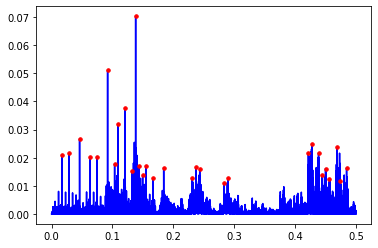

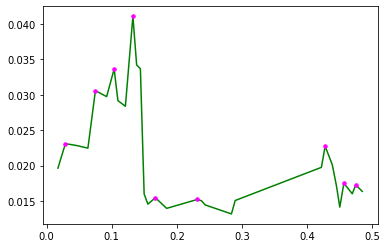

In [10]:
#Use analysis for plant #1 to show plots
R_1, P_1 = analysis_peak_finder(plant_3, plots=True)


For the plant example, the fourier spectrum shown in blue is composed of lots of peaks, a set of peaks are extracted in red, then a moving average is performed on the set and plotted in green, with the peak finder used again to find the concentrations of peaks shown in pink. So this analyses method alows to reduce a complex spectrum to a set of 4 peaks! 

#### 5. Compare peaks of all 6 plant examples Qualitatively

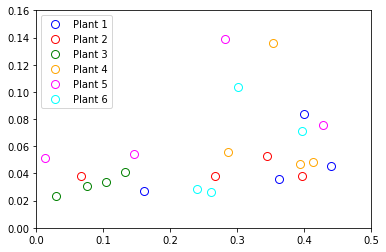

In [11]:
#Now compare all plants characteristics:
R_plants = np.zeros((7,7),float)
R_plants[:,0], P1 = analysis_peak_finder(plant_1)
R_plants[:,1], P2 = analysis_peak_finder(plant_2)
R_plants[:,2], P3 = analysis_peak_finder(plant_3)
R_plants[:,3], P4 = analysis_peak_finder(plant_4)
R_plants[:,4], P5 = analysis_peak_finder(plant_5)
R_plants[:,5], P6 = analysis_peak_finder(plant_6)
#each row is a character in R_plants

#more qualitative:
#plot to see patterns in the plants, plot peaks for each plants:
plt.plot(P1[:,0], P1[:,1], mec='blue', mfc='none', ls='', marker='o', markersize=8, label='Plant 1')
plt.plot(P2[:,0], P2[:,1], mec='red', mfc='none', ls='', marker='o', markersize=8, label='Plant 2')
plt.plot(P3[:,0], P3[:,1], mec='green', mfc='none', ls='', marker='o', markersize=8, label='Plant 3')
plt.plot(P4[:,0], P4[:,1], mec='orange', mfc='none', ls='', marker='o', markersize=8, label='Plant 4')
plt.plot(P5[:,0], P5[:,1], mec='magenta', mfc='none', ls='', marker='o', markersize=8, label='Plant 5')
plt.plot(P6[:,0], P6[:,1], mec='cyan', mfc='none', ls='', marker='o', markersize=8, label='Plant 6')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(0,0.16)
plt.show()


The 4 most prominant peak concentrations for each plant examples are shown. Unfortunatly there is no clear pattern in the location or height of these peaks, which means that while the fourier spectrum hold information about the string, each plants has a widely different fourier spectrum.
The next step of this analysis is to quantify how well two different spectrums agree, which can then be used to quantify how much a string compares to a known plant string.

#### 6. Quantitative Comparison of two spectrums

In [12]:
#compare the freq. and height of peaks P1 to P2:
def compare_peak_f_h(P_compare, P_check):
    freq_diff_input = np.zeros((4,4),float)
    h_diff_input = np.zeros((4,4),float)
    #compare to average of both values, to avoid problems if the peak compared to is much smaller, instead of just error compare to 'correct peak'
    for jj in range(4):
        for ii in range(4):
            freq_diff_input[ii,jj] = abs(P_compare[jj,0] - P_check[ii,0])*2/(P_compare[jj,0]+P_check[ii,0])
            h_diff_input[ii,jj] = abs(P_compare[jj,1] - P_check[ii,1])*2/(P_compare[jj,1]+P_check[ii,1])
    return freq_diff_input, h_diff_input

def comb_4x4():
    '''
    Calculates the different combinations of location in 2D array for 4X4 array with no repeating row or column elements
    Note that 4x4 has total of 65000 combinations while 5x5 order 10^6, so decided for computational time to stop at
    the 4 most prominent peaks in the fourier spectrum.
    
    input:
        Nothing, simply use this function once to have the needed coordinates
    
    output:
        the coordinates needed to check minimum combination for peaks in the fourier spectrum
    '''
    coords = []
    N = 4
    for ii in range(N):
        for jj in range(N):
            coords.append([ii,jj])

    coords = np.array(coords)

    #now select all possible pairs of coordinates:
    select_all = []
    for ii in range(len(coords)):
        for jj in range(len(coords)):
            for kk in range(len(coords)):
                for ll in range(len(coords)):
                    select_all.append([coords[ii],coords[jj], coords[kk], coords[ll]])

    select_all = np.array(select_all)

    #now only pick the coordinates of interest:
    #remove coordinates with repeated row or column numbers:
    #print(select_all[5,2])
    select = []
    for ii in range(len(select_all)):
        if select_all[ii,0,0] == 0 and select_all[ii,1,0] == 1 and select_all[ii,2,0] == 2 and select_all[ii,3,0] == 3: #this allows to only select if 1st coord is in 1st row and 2nd coord in 2nd row
            #now if statements for 'y' part
            if select_all[ii,0,1] != select_all[ii,1,1] and select_all[ii,0,1] != select_all[ii,2,1] and select_all[ii,0,1] != select_all[ii,3,1]: #compare to 0 input to 1 and 2 and 3
                if select_all[ii,1,1] != select_all[ii,2,1] and select_all[ii,1,1] != select_all[ii,3,1]: #compare 1 input to 2 and 3
                    if select_all[ii,2,1] != select_all[ii,3,1]: #compare 2 input to 3
                        select.append(select_all[ii])

    select = np.array(select)
    return select

coord_4x4 = comb_4x4() #keep this calculation outside functions since only needs to be done once ==> code ran 10X faster!

def compare_fourier_peaks(P_compare_2, P_check_2, w=0.2):
    '''
    Compare the 4 most prominent peaks of two fourier spectrum and return a single scalar to quantify 'goodness',
    
    input:
        P_compare_2: set of 4 peaks infor (freq and heigh) 
        P_check_2: set of 4 peaks infor (freq and heigh) Note that because of the way the goodness is codded,
                    it does not matter which spectrum is compare and which is check
        w (optional): Weight of the fourier 
    
    output:
        X_tot: scalar quantifying goodness of 'fit' of fourier spectrum to another fourier spectrum
    '''
    freq_diff, h_diff = compare_peak_f_h(P_compare_2,P_check_2)

    #Now find matching 4 peaks by looking at frequency only (not height since more interested in frequency of patterns)
    #have freq_diff which is 4x4 array with with each entry a comparison to another peak
    #have all possible coordinates

    #coord_4x4 = comb_4x4()

    #now also have coord_4x4 which has each entry being a set of coordinates for the 4x4 freq_diff with no repeating peaks
    #so add up the entry of peak_diff , and compare all posible combinations (24 total for 4x4 matrix)

    #let X_freq quantify the goodness of the 'fit', which thencan be minimized to associate each peak from one fourier spectrum to the
    #peaks from another fourier spectrum. X_freq will simply be the sum in the percent difference of the 4 peaks for the selected combination


    X_freq = np.zeros(24, float) #since 24 possible combinations for 4x4
    for ii in range(24):
        X_freq[ii] = freq_diff[coord_4x4[ii,0,0],coord_4x4[ii,0,1]] + freq_diff[coord_4x4[ii,1,0],coord_4x4[ii,1,1]] + freq_diff[coord_4x4[ii,2,0],coord_4x4[ii,2,1]] + freq_diff[coord_4x4[ii,3,0],coord_4x4[ii,3,1]]

    #find minimum and the associated 'coordinates' for th 4x4 matrix
    coord_min = coord_4x4[np.argmin(X_freq)]

    #now calculate a goodness X_tot (scalar) which includes both the freq. and height (note that the height was not included in the min fitting 
    #since it is not as impotant as the freq.

    #add a weigth factor to the height, w
    X_h_min = h_diff[coord_min[0,0],coord_min[0,1]] + h_diff[coord_min[1,0],coord_min[1,1]] + h_diff[coord_min[2,0],coord_min[2,1]] + h_diff[coord_min[3,0],coord_min[3,1]]
    X_freq_min = freq_diff[coord_min[0,0],coord_min[0,1]] + freq_diff[coord_min[1,0],coord_min[1,1]] + freq_diff[coord_min[2,0],coord_min[2,1]] + freq_diff[coord_min[3,0],coord_min[3,1]]

    X_tot = w*X_h_min + X_freq_min
    
    return X_tot

def compare_fourier_full(plant_A, plant_B, w2=0.2):
    '''
    put the previous analysis into a single function, to be used many times for analysis of randomly generated rules
    
    output:
        X_tot_output from the compare_fourier_peaks function
    '''
    
    R_plants_A, P_compare_input = analysis_peak_finder(plant_A)
    R_plants_B, P_check_input = analysis_peak_finder(plant_B)
    #note that the ratio is not important for this analysis of the fourier spectrum, however it is
    #saved in case want to make analysis which includes the ratios
    
    X_tot_output = compare_fourier_peaks(P_compare_input, P_check_input, w=w2)
    return X_tot_output



The challenge now is to know which peaks to compare to which in the fourier spectrum. each peak has a frequency f and height h, when comparing two spectrum, the sum of the percent difference will be used, $X = \Delta f + \Delta h$ where the difference in frequency and heights are between the peak of one spectrum compared to the other. If they match perfectly, $X=0$, and the objective will be to minimize $X$ to quantify how well two spectrums agree.

The compare_peak_f_h function calculates $\Delta f$ and $\Delta h$ for each 4 peaks of one spectrum compare to all other 4 peaks of the other spectrum, returning a total of 16 difference in f and h. The first minimization problem is in finding which peaks to compare to which. This problem turned out to be more challenging than expected, which led to taking to much computing time when comparing more sets larger than 4 peaks which is why only the 4 most prominant peaks are analysed.

First all possible combinations of peaks are calculated using the comb_4x4 function. Note that this function because too slow for 5 peaks and up. Next only the frequency of these peaks is matched to simplyfy the problem further, and since the frequency in the fourier spectrum contains well understood information about the string of the plant. The compare_fourier_peaks function calculates $X$ for each combination and returns the minimum value found, which is the best combinations of peaks. Lastly compare_fourier_full takes two plant spectrum and returns the $X$ value. Note that a weight factor is added, w, to control how much the height of the peaks affect X, if w=0, then only the frequency is compare and if w>>1, only the height of the peaks is relevent in the X calculation (but not the in peak matching which is done using frequency only).

#### 7. Quantitative comparison of all plant examples relative to each other to find pattern

In [13]:
#now quantitatively compare each plants to each other:
#WHY: see what rules give similar results in fourier spectrums
plant_comparison = np.zeros((6,6),float)
for ii in range(len(plants_to_compare)):
    for jj in range(len(plants_to_compare)):
        plant_comparison[ii,jj] = compare_fourier_full(plants_to_compare[ii],plants_to_compare[jj])

print(plant_comparison)


[[0.         1.70029706 4.83484191 1.16872759 2.81710614 1.44586446]
 [1.70029706 0.         3.83960298 1.88509618 2.64896228 1.66510151]
 [4.83484191 3.83960298 0.         5.45738556 3.80360787 4.90899827]
 [1.16872759 1.88509618 5.45738556 0.         3.20614544 1.15248088]
 [2.81710614 2.64896228 3.80360787 3.20614544 0.         2.76417987]
 [1.44586446 1.66510151 4.90899827 1.15248088 2.76417987 0.        ]]


The plants are now compared to each other to see if a pattern can be found. The printed results is a 6X6 matrix with each entry the X value of comparison between two plants. As a check, the array should be diagonal since comparing plant 1 to 2 is equivalent to comparing plant 2 to 1, and the diagonal elements should be zero, since comparing plant  to 1 should be a perfect match and therefor X=0.
This shows that the value of X varies from ~0.5 to ~5.5 for plants and now clear match between the plants, as expected since no pattern was seen in the spectrums. Note that since both the heigh and frequency are normalized values, and since the X value calculates the relative difference in these values, an X value of ~1 indicates a relative difference of ~100%, so the value can be interpreted as 0.5 being a relatively good match, and 5.5 being a relatively bad one.

In conclusion, there is no clear pattern in the Fourier spectrum between differetn known plant examples. So when comparing an unknown string to a plant, will compare to all 6 plant example known using the function below, which will return the lowest X value (best plant match).

In [14]:
#define function to compare to all 6 possible plants:
def compare_to_all_plant_examples(rule_input, w3=0.2):
    '''
    compare the randomly generated potential plant, and compare to all 6 examples, returns the lowest X_tot value
    '''
    plant_new = L_system(5 , V='F', C='+-[]', A='F', R=[rule_input])[-1]
    X_tot_array = np.zeros(6,float)
    for ii in range(len(plants_to_compare)):
        X_tot_array[ii] = compare_fourier_full(plants_to_compare[ii],plant_new, w2=w3)

    X_tot_min = np.min(X_tot_array)
    return X_tot_min


## Random Rule Generation

Now that a fourier analysis code has been created, the objective will be to generate a random rule for the L-system, then check if the resulting string has a low X value. The hypothesis is that if X is very low, then the spectrum matches that of a plant, which means that the random rule is more likely to draw a plant.
To simplify the problem, only single variable, $V=F$, L-system will be uses, so that a single rule has to be generated. Furthermore, the Axiom will be the same as the plant axioms, $A=F$ and the constants will be $C=+-[]$. Limit the number of characters to be randomly chosen between 12 and 16 characters for the rule.

#### 1. Function to generate useful random rules

In [15]:
#now use that result on randomly generated, single variable plants:
#limit single variable so only one rule to generate
#let the variable be F
#let constants be +-[]
#if [, need a matching ]
#since only one variable, the only relevent axiom is F (can check more axioms later maybe)

#note: generate with seed so always the same
np.random.seed(4) #use at begining of code so get same result everytime I run the code
#IMPORTANT: DO NOT CHANGE THIS SEED

def bracket_correction(random_rule_input):
    '''
    modofy rule so that:
        - no ] characters before [
        - all [ characters have a matching ]
        - innermost layer of [] must have an F character within it to be non trivial
    '''
    random_rule = random_rule_input
    #but this is still too random, need only sets of both [ and ] brackets:
    #note that decided to 'correct; randomly generated rule instead of generating new rule until one meets all criterias since too unlikely
    #first need to get raid of ] if appears before matching [
    count_bracket = 0
    random_rule_corrected = []
    for component in list(random_rule):
        if component != ']':
            random_rule_corrected.append(component)
            if component == '[':
                count_bracket = count_bracket + 1

        if component == ']':
            if count_bracket > 0:
                #add the ], and update the bracket count
                random_rule_corrected.append(component)
                count_bracket = count_bracket - 1

    #2nd need to add hoever many ] brackets needed at the end to match [ brackets:
    for tt in range(count_bracket):
        random_rule_corrected.append(']')

    random_rule = ''.join(random_rule_corrected)

    #lastly, a closed bracket [] will not affect the drawing if no F within it (can have other things such as +,- as well, but need F too
    #this is because if a branch instance is created, but nothing is drawn (by F), then the branch instanced is clossed and the drawing contiues unchanged
    #to do this, without asking for random generation of the whole string to have this since it would be too unlikely to have a rule meet all criterias randomly,
    #will add an F between [] if no F present at a random location in []
    #ex: -F[+] ==> -F[F+] or -F[+F]
    #ex: -F[[-+]F] ==> -F[[-F+]F]
    #ex: -F[[-F]+] ==> unchanged! since F within both sets of []
    #check if F within brackets:
    start_check = []
    non_nested_brackets = []
    #random_rule = '+-F[+[--]F]F[+[][+[F--]]F]+' test used
    count = 0
    for component in list(random_rule):
        #print(component)
        if component == '[':
            non_nested_brackets.append(''.join(start_check))
            start_check = []
        
        start_check.append(component)
        
        if component == ']':# and start_check[0] == '[':
            non_nested_brackets.append(''.join(start_check))
            start_check = []
    non_nested_brackets.append(''.join(start_check)) #append the last part of the string if does not end in ]  
        
    #print(non_nested_brackets)
    #have list broken into piece I need, with some starting and ending with [] which need to have F added
    new_non_nested_brackets = []
    
    #now have a list of non_nested brackets, can modify to add F randomly in it:
    for tt in range(len(non_nested_brackets)):
        if len(non_nested_brackets[tt]) > 0: #in case the str is empty
            old_bracket_0 = list(non_nested_brackets[tt]) #look at one bracket
            if old_bracket_0[0] == '[' and old_bracket_0[-1] == ']': #only modify nested brackets
                new_bracket_0 = np.empty(len(old_bracket_0)+1,dtype=str) #make new copy with one extra element length to place F
                new_bracket_0[0] = old_bracket_0[0] #know that first is [
                new_bracket_0[-1] = old_bracket_0[-1] #last is ] always
                number_0 = len(new_bracket_0) - 2 #found how many spots can F occupy
                random_number_0 = np.random.randint(0, number_0) #pick a spot for F randomly
                new_bracket_0[1+random_number_0] = 'F' #put F in randomly choosen spot
                for ff in range(number_0-1): #place the old_bracket inner components back
                    for ee in range(len(new_bracket_0)):
                        if new_bracket_0[ee] == '': #check that empty then fill with component
                            new_bracket_0[ee] = old_bracket_0[ff+1]
                            break #once filled, break out of inner loop and place next component
                
                new_non_nested_brackets.append(''.join(new_bracket_0)) #save new nested bracket
            else:
                new_non_nested_brackets.append(non_nested_brackets[tt])

    #print(random_rule)
    #print(''.join(new_non_nested_brackets))
    random_rule_output = ''.join(new_non_nested_brackets)
    
    return random_rule_output

#generates a rule
def rule_generator(character_min, character_max):
    '''
    Generates a semi random rule, with a number of character set by function input,
    with at lest one F so non-trivial results, and only closed sets of brackets []
    NOTE: the number of characters for the rule can exceed max character number given
    (ex: [[[ randomly generated will be corrected to ]]])
    '''
    charac = list('F+-[]')
    prob = [0.2, 0.2, 0.2, 0.2, 0.2] #equal probability

    #generate random number of characters in rule
    number_of_characters = np.random.randint(character_min, character_max+1)

    #generate random rule
    random_rule = ''.join(np.random.choice(charac, number_of_characters, p=prob))

    random_rule = bracket_correction(random_rule) #use bracket correction function to have sensible rule which can be drawn and non-trivial
    
    #but this is too random, need at least 3F in it to draw something:
    #note that 1F leads to a string with a signle F at the end of iterations, so only draws a line in some direction
    #if 2F, string too short after 5 iterations (~340 characters) to analyse spectrum
    #use 3F to strart getting results with relevent fourier spectrums (~1330 characters)
    #note that unlikely to not have 3F already because of bracket correction function used, however need to guarenty more than 3F
    #3F is too small and can lead to problem with peak analyser
    #4F is loarge enough, also note that plant exemple rules use 5-8 F per rule
    check_F = True
    while check_F: #continue until an F is found
        count_F = 0
        #count the F
        for component in list(random_rule):
            if component == 'F':
                count_F = count_F + 1
        
        #check if at least 3 F:
        if count_F >= 4:
            check_F = False #false means that no new random rule will be generated
        
        if check_F:#set to true if less than 3 F in string, then remake a rule: 
            random_rule = ''.join(np.random.choice(charac, number_of_characters, p=prob)) #regenerate a rule since likely to get at least 3 F
            random_rule = bracket_correction(random_rule) #more likely to get at least 3F after corrction, and need to do corection everytime.
    
    return random_rule



Implementation of the Random RUle generator:
First, a random seed is used so that while the output will be random it will be the same output everytime the code is ran.
The rule is generated by selecting a rule size, between 12 and 16 characters. 
However, many rules randomly generated are not valid. The following conditions need to be met: 
- Can only have $[$ and $]$ appear in pairs, with $]$ character always on the right of its $[$ counterpart, since a branch need to be opened before it is closed. 
- The lowest level branch need to have an F character to be non-trivial. Since the position and direction of drawing within a branch is only relevent if it is used to draw something.

Since it is unlikely to randomly generate exactly these conditions, the random rule is modified using bracket_correction function, which removes instances of $]$ if appears without a $[$ counterpart somewhere in the string on its left, it also matches any unmatched $[$ with an $]$ at the end of the rule, and locate the innermost branches and if no F character within it, it adds one at a random location within it.

An extra condition is that if no F in the rule, then nothing will be drawn. If one F within rule, then only a single F will be in the string after many iteration, so only a single line element in some direction will be drawn, which is also trivial. If two or three F in the string, the string will be too short to fourier analyses after 5 iterations (minimum string length of ~1300 for three F), therefore a condition that a minimum of four F are present is added. If that condition is not met, the rule is randomly generated again. Note that this is likely to happen since draw out of 5 possible character minimum of 12 times, and the bracket correction adds F characters.

#### 2. Compare two randomly generated rules and the associated X value

In [16]:
#use the new rule to draw a plant:
#NEED to run from cell with seed everytime run the code to get the same results

new_rule_good = rule_generator(1,16)
new_rule_bad = rule_generator(1,16) #note happen to be in that order, check by eye and 1st was good, 2nd was bad

#study how 'good' vs 'bad' compare with the fourier analysis:
draw(5 , V1='F', C1='+-[]', A1='F', R1=[new_rule_good], angle=25.7, length=20, start=[-50,-100])
draw(5 , V1='F', C1='+-[]', A1='F', R1=[new_rule_bad], angle=25.7, length=20, start=[0,0])

X_rule_good = compare_to_all_plant_examples(new_rule_good,w3=1.)
X_rule_bad = compare_to_all_plant_examples(new_rule_bad,w3=1.)

print('The randomly generate rule', new_rule_good, 'drew something that resembles a plant, with X =', X_rule_good)
print('The randomly generate rule', new_rule_bad, 'drew something that DOES NOT resembles a plant, with X =', X_rule_bad)
#surprisingly, the X value for the bad looking plant is lower than for the good looking plant
#this shows that a better match might not indicate a better plant

The randomly generate rule F[-F+[F][FF]] drew something that resembles a plant, with X = 2.218199249185516
The randomly generate rule +[+F][+[F]FF] drew something that DOES NOT resembles a plant, with X = 2.3375313152430355


Two rules with 1 to 16 characters were randomly generated. Note that the random seed generation was selected so that one of these rules will draw something resembling a plant ('good'), and the other would not ('bad').
The step confirms that the rules made lead to strings generated by the L-system which can be drawn by the drawing function.

Note that something that resembles a plant is defines as something with branches that grows in roughly one directions. Here the thing that does not resemble a plant does not grow since all lines are drawn for the origin everytime.

The X value is calculated for both rules, and surprisingly the X value is lower for the drawing which does not resembles a plant. This indicates that the X value is not a perfect metric, and that a string with a higher X value might sometimes resemble more a plant. However now need to study the statistics of this, in other words, will strings will lower X values generally resemble more a plant? This question is answered in the next steps.

#### 3. Statistics on randomly generated rules

The limitation in generating the rules and the code to analyse the spectrum of the string generated by the L-system is that it is computationally demending and takes ~0.3 seconds for each rules. The other limitation is that to quantify if the X value is a metric which can be used, need to look at the generated drawings by eye, therefor the number of drawings checks cannot be too large.

First 25 rules and associated string will be generated and the drawings quantified by eye, then 250 rules and associated string will be generated, then the top 25 strings with lowest X values will be selected (top 10%), and the drawings for this subset will quantified by eye.

In [17]:
#create and draw 25 random plants:
#NEED to run from cell with seed everytime run the code to get the same results

new_rule_array = []
K = 25 #number of plots to draw
for hh in range(K):
    new_rule_array.append(rule_generator(12,16)) #increase the minimum number of characters for more interesting results


X_array = np.zeros(K, float)
for ii in range(len(new_rule_array)):
    X_array[ii] = compare_to_all_plant_examples(new_rule_array[ii], w3=1.)

#keep the index to track and double check code
random_X = np.column_stack((np.array(np.linspace(0,K-1,K),int), np.array(new_rule_array), X_array))
    
counter = 0
for the_rule in new_rule_array:
    #print(the_rule, random_X[counter,2])
    counter = counter + 1
    the_file = the_rule + '.eps'
    draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule], angle=25.7, length=10, start=[0,0], save=False, filename=the_file)
    if counter == 8: #only draw the entries which look like a plant
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule], angle=25.7, length=1.3, start=[0,-230], save=False, filename=the_file)
        print('Rule 8 resembles a plant, with the following rule:', the_rule, 'and X =', random_X[counter,2])
    if counter == 22: #only draw the entries which look like a plant
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule], angle=25.7, length=15, start=[0,0], save=False, filename=the_file)
        print('Rule 22 resembles a plant, with the following rule:', the_rule, 'and X =', random_X[counter,2])


Rule 8 resembles a plant, with the following rule: FF[F]F[[+-+F]++] and X = 1.718332263251417
Rule 22 resembles a plant, with the following rule: +F-[[F[[F]++F+[[F]]]]] and X = 2.0358215953677385


These 25 drawn L-systems are all very random, with the following drawings: (add figure here)

Only entries 8 and 22 resemble a plant. The associated X values are 1.7 and 2.0 respectively, which are relatively high. Note that the orientation of the plant is not relevent in defining wether or not the drawing looks like a plant.

In [137]:
#now compare if generate 250, and select top 25 X values:
#NEED to run from cell with seed everytime run the code to get the same results

new_rule_array_2 = []
M = 250
for hh in range(M):
    new_rule_array_2.append(rule_generator(12,16)) #increase the minimum number of characters for more interesting results

X_array_2 = np.zeros(M, float)
for ii in range(len(new_rule_array_2)):
    X_array_2[ii] = compare_to_all_plant_examples(new_rule_array_2[ii], w3=1.)

#keep the index to track and double check code
table_X_index = np.column_stack((np.array(np.linspace(0,M-1,M),int), np.array(new_rule_array_2), X_array_2))

#now select the top 25 rules with lowest X_tot values: 
#sort the table with first row being the lowest value of X_tot
sorted_table_X_index = table_X_index[np.argsort(table_X_index[:, 2])]

best_rules_from_X = sorted_table_X_index[:K,1:]

#draw the top 25 rules:
counter_2 = 0
for the_rule in best_rules_from_X:
    counter_2 = counter_2 + 1
    #print(the_rule[0], the_rule[1])
    the_file = the_rule[0] + '.eps'
    #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule[0]], angle=25.7, length=10, start=[0,0], save=False, filename=the_file)
    if counter_2 == 10:
        print('Image 10 resembles a plant, with the following rule:', the_rule[0], 'and X =', the_rule[1])
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule[0]], angle=25.7, length=5, start=[200,-200], save=False, filename=the_file)
    if counter_2 == 11:
        print('Image 11 resembles a plant, with the following rule:', the_rule[0], 'and X =', the_rule[1])
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule[0]], angle=25.7, length=6, start=[-200,-200], save=False, filename=the_file)
    if counter_2 == 16:
        print('Image 16 resembles a plant, with the following rule:', the_rule[0], 'and X =', the_rule[1])
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule[0]], angle=25.7, length=8, start=[0,-200], save=False, filename=the_file)
    if counter_2 == 20:
        print('Image 20 resembles a plant, with the following rule:', the_rule[0], 'and X =', the_rule[1])
        #draw(5 , V1='F', C1='+-[]', A1='F', R1=[the_rule[0]], angle=25.7, length=30, start=[0,-50], save=False, filename=the_file)


#note that this cell takes ~30s-60s to execute

Image 10 resembles a plant, with the following rule: F+F+--[F+F] and X = 1.6330605803758975
Image 11 resembles a plant, with the following rule: F-[F]F[F+F]+F[F-] and X = 1.649229548595416
Image 16 resembles a plant, with the following rule: FF[-F]F[F]F+F-[F-] and X = 1.7168662789372948
Image 20 resembles a plant, with the following rule: [F]-+F-+[[+F][F]] and X = 1.78510461291704


Now 250 rules and associated strings were generated, with only the lowest 25 X values selected and drawn: (add figure here)

These 25 drawn L-systems have now 4 rules resembling plants, as opposed to 2 rules for fully random rules. Entries 10, 11, 16 and 22 resemble a plant. The associated X values are 1.6, 1.6, 1.7 and 1.8 respectively, which are relatively high. Note that the entry 1 has the lowest X value of the subset and entry 25 has highest. 

So when taking random rules, 8% (2/25) of the time the rules led to drawings of plants, while when taking the top 10% (25/250) of as set, as quantified by the X value, the rules led to a drawing of plants 16% (4/25) of the time.

While this set is relatively small to be very conclusive, it hints that lower X value can be used to be more likely to generate a rule for a single variable L-system that leads to a drawing of a plant!

## Conclusion for Case Study:

The Fourier spectrum analysis used is not enough to consistantly quantify if string is a plant or not. However, the spectrums contain some information about the plant, and the analysis hint that statistically, the match of fourier spectrum to known plants, quantified by the X value, lead to a rule being more likely to draw a plant by a factor of 2.

A summary of what was done in this case study is:
- Created a way to take the fourier transform of a string generated by an L-system, then quantified the peak concentrations in that fourier spectrum.
- Coded a way of comparing fourier spectrums, which matchs 2 spectrum and calculate a chi_square equivalent, called X value, which needs to be minimized.
- Analyse and compared fourier spectrums of 6 plant examples, with no clear patterns in the 4 most prominant peaks found when comparing all 6 examples.
- Coded a random, non-trivial, rule generation code for single variable L-systems.
- Studied statistically weather or not the X value helps to indicates if a rule will generate a plant. Found that for random rules, 8% generate plants, while for set from which the top 10% X values are taken, that subset has 16% of its rules which generate plants.

Overall only statistical hint that fourier spectrum and the X value helps in finding rules to draw plants, however did thorough study of that kind of chaotic system, where small deviations in rules lead to widely different drawings which cannot be fully quantified by selecting the most relevent four peak concentrations of the fourier spectrum.

The next steps to continue this study of Fourier analysis would be to increase the size of the sets analysed by eye to be much larger than 25. Another important apsect is that only 6 plant examples are used to compare to get X values. Since can now generate rules which look like plants (just in looking at these total of 50 images, 6 were found!), the function to calculate X value could be improved to compare to more plant example. Lastly the study could be further improved with a more complex peak analysis of the fourier spectrum, rather than the 4 peak concentration used. Note that any further analysis would liekly require improving further the speed of computation since the study of 250 strings here required running the code on the order of minutes.